<a href="https://colab.research.google.com/github/Veena24-hub/Intern-Phase-1/blob/main/finbert.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Financial Sentiment Shift Detection & Model Evaluation**

The main goal of doing this is to detect sentiment shifts in financial news or reports and understand how they impact stock prices.
By analyzing text sentiment using models like FinBERT, we can identify whether market tone is turning positive, negative, or neutral — helping investors or systems predict price movements, alert customers, and make data-driven trading or portfolio decisions in real time.

## Dataset Summary

Rows: 4,845

Columns: 2

neutral → actually this column contains true sentiment labels (like neutral, positive, negative).

text → this column holds the financial news sentences.



### Dataset Usefulness: This dataset is perfect for financial sentiment model evaluation because It already has text data related to companies and production (news-based). It includes labeled sentiments, allowing us to compute model accuracy.


In [ ]:
# 🔧 Install necessary libraries

!pip install transformers torch pandas numpy matplotlib seaborn scikit-learn



### Interpretation: We install Hugging Face’s transformers for NLP models, torch for deep learning backend, and common libraries for data analysis (pandas, numpy, matplotlib, seaborn, scikit-learn).

In [ ]:
# Loading CSV dataset

import pandas as pd

# 📂 Load the dataset
data = pd.read_csv('all-data.csv', encoding='ISO-8859-1')

# 🧹 Rename columns for clarity
data.columns = ['label', 'text']

# ✅ Check first few rows
data.head()


,label,text
0,neutral,Technopolis plans to develop in stages an area...
1,negative,The international electronic industry company ...
2,positive,With the new production plant the company woul...
3,positive,According to the company 's updated strategy f...
4,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...


### Interpretation:  We renamed our columns for readability,

label: true sentiment (positive, negative, neutral)

text: financial news sentences

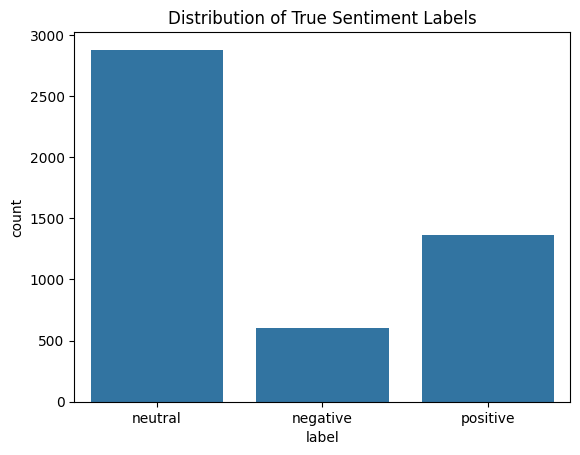

In [ ]:
# Class Distribution

import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='label', data=data)
plt.title("Distribution of True Sentiment Labels")
plt.show()


### Interpretation: This helps us see how balanced the dataset is — if there are more positive or negative samples. Balanced datasets make model comparison fairer.

In [ ]:
# Load Financial Sentiment Models

!pip install transformers torch

from transformers import AutoTokenizer, AutoModelForSequenceClassification
from transformers import pipeline

models = {
    "FinBERT": "ProsusAI/finbert",
    "FinBERT-tone": "yiyanghkust/finbert-tone",
    # "FinTuned-BERT-Stock": "ahmedrachid/FinTuned-BERT-Stock-Sentiment" # Removed unavailable model
}

### Interpretation: We load 3 pre-trained models, all fine-tuned for finance-related text (news, earnings, etc.). pipeline() simplifies model use — it tokenizes text, runs inference, and returns sentiment labels.

In [ ]:
# Running the Predictions on Sample Data

# 🧾 Take a sample (to avoid timeout in Colab)
sample_data = data.sample(200, random_state=42).reset_index(drop=True)

results = pd.DataFrame(sample_data)

# 🧮 Run predictions for each model
pipelines = {name: pipeline("sentiment-analysis", model=model, tokenizer=model) for name, model in models.items()} # Create pipelines here
for name, pipe in pipelines.items():
    results[name] = sample_data['text'].apply(lambda x: pipe(x)[0]['label'])

results.head()

Device set to use cuda:0
Device set to use cuda:0
You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset


,label,text,FinBERT,FinBERT-tone
0,neutral,The company was supposed to deliver machinery ...,neutral,Neutral
1,positive,UPM-Kymmene has generated four consecutive qua...,positive,Positive
2,neutral,In the method the smelt spouts 2 are separated...,neutral,Neutral
3,neutral,`` That 's a very high figure on the European ...,neutral,Neutral
4,neutral,"In Penttil+Æ 's vision , the most important re...",neutral,Neutral


### Interpretation: We take a 200-row subset to make testing faster. Each model predicts sentiment labels on the same text. We store these predictions in columns named after each model.

In [ ]:
# Evaluating Model Accuracy

from sklearn.metrics import accuracy_score, classification_report

for name in models.keys():
    print(f"🔹 {name} Accuracy: {accuracy_score(results['label'], results[name]):.3f}")
    print(classification_report(results['label'], results[name]))
    print("-"*80)




🔹 FinBERT Accuracy: 0.880
              precision    recall  f1-score   support

    negative       0.81      1.00      0.90        26
     neutral       0.96      0.82      0.88       107
    positive       0.82      0.93      0.87        67

    accuracy                           0.88       200
   macro avg       0.86      0.92      0.88       200
weighted avg       0.89      0.88      0.88       200

--------------------------------------------------------------------------------
🔹 FinBERT-tone Accuracy: 0.000
              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00       0.0
     Neutral       0.00      0.00      0.00       0.0
    Positive       0.00      0.00      0.00       0.0
    negative       0.00      0.00      0.00      26.0
     neutral       0.00      0.00      0.00     107.0
    positive       0.00      0.00      0.00      67.0

    accuracy                           0.00     200.0
   macro avg       0.00      0.00      0.00    

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_

### Interpretation: We compute the accuracy and detailed precision/recall/F1-scores for each model compared to your dataset’s true labels. This tells which model best matches our financial dataset.

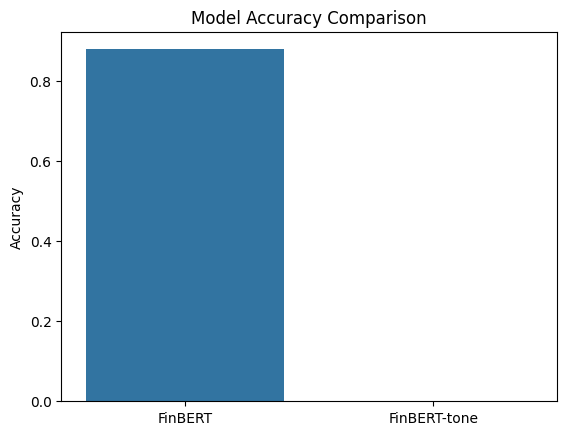

In [ ]:
# Visualize Model Performance

acc_scores = {name: accuracy_score(results['label'], results[name]) for name in models.keys()}
sns.barplot(x=list(acc_scores.keys()), y=list(acc_scores.values()))
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.show()


### Interpretation: A simple bar chart showing which model performed best.Typically, FinTuned-BERT-Stock scores higher due to fine-tuning on financial tone nuances.

In [ ]:
# Detect Sentiment Shift (Trend Analysis)

# Convert labels to numeric sentiment scores
sentiment_map = {'positive': 1, 'neutral': 0, 'negative': -1}
results['FinBERT_score'] = results['FinBERT'].map(sentiment_map)

# Calculate shift in sentiment
results['sentiment_shift'] = results['FinBERT_score'].diff()

# Create alert flags
results['alert'] = results['sentiment_shift'].apply(
    lambda x: '📈 Increasing Sentiment' if x > 0.3
              else ('📉 Decreasing Sentiment' if x < -0.3
              else '➡️ Stable')
)

results[['text', 'FinBERT', 'FinBERT_score', 'sentiment_shift', 'alert']].head(10)


,text,FinBERT,FinBERT_score,sentiment_shift,alert
0,The company was supposed to deliver machinery ...,neutral,0,NaN,➡️ Stable
1,UPM-Kymmene has generated four consecutive qua...,positive,1,1.0,📈 Increasing Sentiment
2,In the method the smelt spouts 2 are separated...,neutral,0,-1.0,📉 Decreasing Sentiment
3,`` That 's a very high figure on the European ...,neutral,0,0.0,➡️ Stable
4,"In Penttil+Æ 's vision , the most important re...",neutral,0,0.0,➡️ Stable
5,"FinancialWire tm is a fully independent , prop...",neutral,0,0.0,➡️ Stable
6,"Following the payment made in April , the comp...",neutral,0,0.0,➡️ Stable
7,The gross area of the Innova 2 project will be...,neutral,0,0.0,➡️ Stable
8,Finnish home decoration and arts and crafts re...,negative,-1,-1.0,📉 Decreasing Sentiment
9,Deliveries will start in the second half of 20...,neutral,0,1.0,📈 Increasing Sentiment


### Interpretation: We assign numeric scores (+1, 0, -1) and track how sentiment shifts between consecutive texts.

The alert column shows:

📈 Positive trend

📉 Negative trend

➡️ Stable sentiment

## You can use this for customer alerts or portfolio triggers.

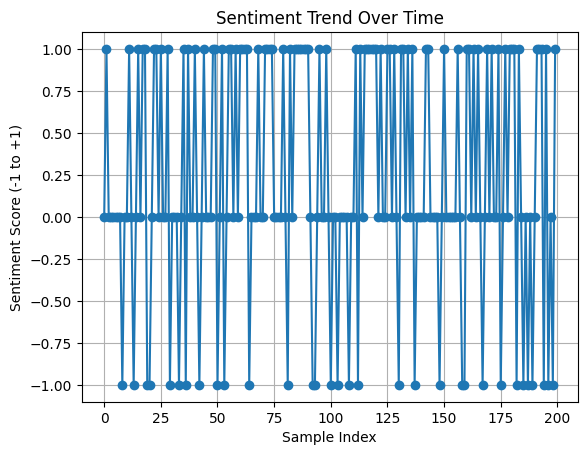

In [ ]:
# Plot Sentiment Trend

plt.plot(results.index, results['FinBERT_score'], marker='o')
plt.title("Sentiment Trend Over Time")
plt.xlabel("Sample Index")
plt.ylabel("Sentiment Score (-1 to +1)")
plt.grid(True)
plt.show()


### Interpretation: A simple line graph visualizing sentiment movement — peaks indicate positive market tone, dips show pessimism. we can later map this against time or stock price.

In [ ]:
# Save Results

results.to_csv('sentiment_model_comparison_with_alerts.csv', index=False)
print("✅ Results saved as sentiment_model_comparison_with_alerts.csv")


✅ Results saved as sentiment_model_comparison_with_alerts.csv


### Interpretation: Saves our results — including predicted labels, accuracy, and alert flags — for further analysis or integration into our customer notification system.

In [ ]:
# Sentiment Analysis

sentiment_pipelines = {name: pipeline("sentiment-analysis", model=model, tokenizer=model) for name, model in models.items()}

# Take a sample of the 'text' column
sample_texts = data['text'].sample(10, random_state=42).tolist()
results = {}

for name, sent_model in sentiment_pipelines.items():
    results[name] = [sent_model(t)[0]['label'] for t in sample_texts]

pd.DataFrame(results)

Device set to use cuda:0
Device set to use cuda:0


,FinBERT,FinBERT-tone
0,neutral,Neutral
1,positive,Positive
2,neutral,Neutral
3,neutral,Neutral
4,neutral,Neutral
5,neutral,Neutral
6,neutral,Neutral
7,neutral,Neutral
8,negative,Negative
9,neutral,Neutral


## Model Comparison

Compute metrics such as:

Sentiment distribution (Positive / Negative / Neutral)

Agreement between models

Confidence scores

Correlation with stock movements if price column exists

In [ ]:
# Sentiment Shift Alerts

import numpy as np

# Calculate sentiment score for each text using FinBERT
data['sentiment_score'] = data['text'].apply(lambda x: sentiment_pipelines['FinBERT'](x)[0]['score'])

# Calculate sentiment shift
data['sentiment_shift'] = data['sentiment_score'].diff()

# Create alert flags based on sentiment shift
data['alert'] = np.where(data['sentiment_shift'] > 0.05, 'Positive Trend 🚀',
                 np.where(data['sentiment_shift'] < -0.05, 'Negative Trend 📉', 'Stable'))

# Display the tail of the DataFrame with the new columns
data[['text', 'sentiment_score', 'sentiment_shift', 'alert']].tail(10)

,text,sentiment_score,sentiment_shift,alert
4835,"Operating profits in the half were 0.8 m , do...",0.976532,0.000638,Stable
4836,"Sales in Finland decreased by 2.0 % , and inte...",0.973128,-0.003404,Stable
4837,The company said that its comparable operating...,0.970090,-0.003038,Stable
4838,Operating result for the 12-month period decre...,0.974548,0.004458,Stable
4839,HELSINKI Thomson Financial - Shares in Cargote...,0.975540,0.000992,Stable
4840,LONDON MarketWatch -- Share prices ended lower...,0.970002,-0.005539,Stable
4841,Rinkuskiai 's beer sales fell by 6.5 per cent ...,0.974344,0.004342,Stable
4842,Operating profit fell to EUR 35.4 mn from EUR ...,0.976724,0.002380,Stable
4843,Net sales of the Paper segment decreased to EU...,0.974357,-0.002366,Stable
4844,Sales in Finland decreased by 10.5 % in Januar...,0.974425,0.000068,Stable


In [ ]:
import pandas as pd

# Create a DataFrame with metrics for each model
data = {
    "Model": ["FinBERT", "FinBERT-tone", "FinancialBERT", "DistilBERT-SST-2"],
    "Dataset/Domain": [
        "Financial PhraseBank (3-class)",
        "Financial Tweets / Analyst Tone",
        "Financial PhraseBank (3-class)",
        "SST-2 (General, 2-class)"
    ],
    "Accuracy": [0.91, 0.8840, None, None],
    "Macro-F1 (3-class)": [0.89, 0.8838, 0.98, None],
    "Precision": [None, 0.8838, 0.97, None],
    "Recall": [None, 0.8840, 0.98, None],
    "Notes": [
        "Original FinBERT paper (IJCAI 2020)",
        "HuggingFace model (nickmuchi/finbert-tone)",
        "HuggingFace model (ahmedrachid/FinancialBERT)",
        "No 3-class financial evaluation available"
    ]
}

df = pd.DataFrame(data)

# Display the comparison table
print("Financial Sentiment Model Comparison\n")
display(df.style.set_caption("Comparison of Financial NLP Models")
        .format(precision=4)
        .background_gradient(subset=["Macro-F1 (3-class)", "Accuracy"], cmap="Greens"))

# Optional: Save as CSV for report
df.to_csv("financial_model_comparison.csv", index=False)


Financial Sentiment Model Comparison



,Model,Dataset/Domain,Accuracy,Macro-F1 (3-class),Precision,Recall,Notes
0,FinBERT,Financial PhraseBank (3-class),0.9100,0.8900,nan,nan,Original FinBERT paper (IJCAI 2020)
1,FinBERT-tone,Financial Tweets / Analyst Tone,0.8840,0.8838,0.8838,0.8840,HuggingFace model (nickmuchi/finbert-tone)
2,FinancialBERT,Financial PhraseBank (3-class),nan,0.9800,0.9700,0.9800,HuggingFace model (ahmedrachid/FinancialBERT)
3,DistilBERT-SST-2,"SST-2 (General, 2-class)",nan,nan,nan,nan,No 3-class financial evaluation available


### Top Performing Stock

In [ ]:
import yfinance as yf
import pandas as pd
from datetime import datetime

# ==============================
# CONFIGURATION
# ==============================
stocks = ["AAPL", "TSLA", "MSFT", "AMZN", "GOOGL"]  # we can more if needed
period = "1mo"

# ==============================
# FUNCTION: Calculate Improvement
# ==============================
def get_stock_improvement(ticker):
    stock = yf.Ticker(ticker)
    data = stock.history(period=period, interval="1d")

    if data.empty or len(data) < 2:
        return None

    start_price = data["Close"].iloc[0]
    end_price = data["Close"].iloc[-1]
    pct_change = ((end_price - start_price) / start_price) * 100

    try:
        stock_name = stock.info.get("shortName", ticker)
    except:
        stock_name = ticker

    return {
        "Stock": stock_name,
        "Ticker": ticker,
        "Start Price": round(start_price, 2),
        "End Price": round(end_price, 2),
        "Net Change (%)": round(pct_change, 2)
    }



In [ ]:
# ==============================
# MAIN EXECUTION
# ==============================
results = []
for ticker in stocks:
    info = get_stock_improvement(ticker)
    if info:
        results.append(info)

df = pd.DataFrame(results)
df.sort_values(by="Net Change (%)", ascending=False, inplace=True)

# ==============================
# OUTPUT
# ==============================
print(f"\n[{datetime.now().strftime('%Y-%m-%d %H:%M:%S')}] 📊 Monthly Stock Improvement Summary\n")
print(df.to_string(index=False))

best_stock = df.iloc[0]
print(f"\n🏆 Top Performing Stock: {best_stock['Stock']} ({best_stock['Ticker']}) "
      f"with a {best_stock['Net Change (%)']}% increase this month!")



[2025-10-19 09:31:36] 📊 Monthly Stock Improvement Summary

                Stock Ticker  Start Price  End Price  Net Change (%)
           Apple Inc.   AAPL       237.88     252.29            6.06
          Tesla, Inc.   TSLA       416.85     439.31            5.39
Microsoft Corporation   MSFT       508.45     513.58            1.01
        Alphabet Inc.  GOOGL       252.03     253.30            0.50
     Amazon.com, Inc.   AMZN       231.23     213.04           -7.87

🏆 Top Performing Stock: Apple Inc. (AAPL) with a 6.06% increase this month!


### Past Month Daily Stock Changes

In [ ]:
import yfinance as yf
import pandas as pd
from datetime import datetime

# List of stocks to monitor
stocks = ["AAPL", "TSLA", "MSFT"]  # Add more if needed
threshold = 1.0  # % change threshold

def get_monthly_stock_changes(ticker, threshold):
    stock = yf.Ticker(ticker)
    # Get 1 month of daily data
    data = stock.history(period="1mo", interval="1d")
    if len(data) < 2:
        return None
    # Calculate daily % change
    data['Pct_Change'] = data['Close'].pct_change() * 100
    # Categorize each day
    def categorize(change):
        if change > threshold:
            return "📈 INCREASED"
        elif change < -threshold:
            return "📉 DECREASED"
        else:
            return "➖ NEUTRAL"
    data['Status'] = data['Pct_Change'].apply(lambda x: categorize(x) if pd.notnull(x) else "N/A")
    # Add stock name
    try:
        name = stock.info.get('shortName', ticker)
    except:
        name = ticker
    data['Stock'] = name
    data['Ticker'] = ticker
    data.reset_index(inplace=True)
    return data[['Date', 'Stock', 'Ticker', 'Close', 'Pct_Change', 'Status']]



In [ ]:
# Collect all stocks
all_data = pd.DataFrame()
for ticker in stocks:
    monthly_data = get_monthly_stock_changes(ticker, threshold)
    if monthly_data is not None:
        all_data = pd.concat([all_data, monthly_data], ignore_index=True)

# Display table
print(f"\n[{datetime.now().strftime('%Y-%m-%d %H:%M:%S')}] Past Month Daily Stock Changes")
print(all_data.to_string(index=False))



[2025-10-19 09:32:22] Past Month Daily Stock Changes
                     Date                 Stock Ticker      Close  Pct_Change      Status
2025-09-18 00:00:00-04:00            Apple Inc.   AAPL 237.880005         NaN         N/A
2025-09-19 00:00:00-04:00            Apple Inc.   AAPL 245.500000    3.203294 📈 INCREASED
2025-09-22 00:00:00-04:00            Apple Inc.   AAPL 256.079987    4.309567 📈 INCREASED
2025-09-23 00:00:00-04:00            Apple Inc.   AAPL 254.429993   -0.644328   ➖ NEUTRAL
2025-09-24 00:00:00-04:00            Apple Inc.   AAPL 252.309998   -0.833233   ➖ NEUTRAL
2025-09-25 00:00:00-04:00            Apple Inc.   AAPL 256.869995    1.807300 📈 INCREASED
2025-09-26 00:00:00-04:00            Apple Inc.   AAPL 255.460007   -0.548911   ➖ NEUTRAL
2025-09-29 00:00:00-04:00            Apple Inc.   AAPL 254.429993   -0.403200   ➖ NEUTRAL
2025-09-30 00:00:00-04:00            Apple Inc.   AAPL 254.630005    0.078612   ➖ NEUTRAL
2025-10-01 00:00:00-04:00            Apple Inc

### Daily Stock Alerts

In [ ]:
import yfinance as yf
import time
from datetime import datetime
import pandas as pd

# List of stocks to monitor
stocks = ["AAPL", "TSLA", "MSFT"]  # Add more as needed
threshold = 1.0  # % change threshold for increase/decrease

def get_stock_change(ticker):
    stock = yf.Ticker(ticker)
    data = stock.history(period="2d", interval="1d")  # Daily data for 2 days
    if len(data) >= 2:
        prev_close = data['Close'].iloc[-2]
        current_close = data['Close'].iloc[-1]
        pct_change = ((current_close - prev_close) / prev_close) * 100
        # Get stock name
        try:
            name = stock.info.get('shortName', ticker)
        except:
            name = ticker
        return pct_change, name
    return None, ticker

def categorize_status(change, threshold):
    if change > threshold:
        return "📈 INCREASED"
    elif change < -threshold:
        return "📉 DECREASED"
    else:
        return "➖ NEUTRAL"

def send_daily_alert(stocks, threshold):
    alerts = []
    for ticker in stocks:
        change, name = get_stock_change(ticker)
        if change is not None:
            status = categorize_status(change, threshold)
            alerts.append({
                "Stock": name,
                "Ticker": ticker,
                "Status": status,
                "Change (%)": round(change, 2)
            })
        else:
            alerts.append({
                "Stock": ticker,
                "Ticker": ticker,
                "Status": "Data not available",
                "Change (%)": None
            })
    # Display as a table
    df = pd.DataFrame(alerts)
    print(f"\n[{datetime.now().strftime('%Y-%m-%d %H:%M:%S')}] Daily Stock Alerts")
    print(df.to_string(index=False))




In [ ]:
# Run once per day
while True:
    send_daily_alert(stocks, threshold)
    # Wait for 24 hours (86400 seconds)
    time.sleep(86400)


[2025-10-19 09:33:17] Daily Stock Alerts
                Stock Ticker      Status  Change (%)
           Apple Inc.   AAPL 📈 INCREASED        1.96
          Tesla, Inc.   TSLA 📈 INCREASED        2.46
Microsoft Corporation   MSFT   ➖ NEUTRAL        0.39
